In [2]:
import emcee
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data = np.loadtxt('/d/scratch/ASTR5160/week13/line.data')
variance = np.array([ np.var(data.T[i], ddof=1) for i in range(10) ])
y = [ np.mean(data.T[i]) for i in range(10) ]
x = np.arange(0, len(data[0])) + 0.5

In [28]:
def log_likelihood(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    sigma2 = yerr**2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(2 * np.pi * sigma2))

In [29]:
def log_prior(theta):
    m, b = theta
    if 0 < m < 8.0 and 0.0 < b < 8.0:
        return 0.0
    return -np.inf

In [30]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [31]:
nwalkers, ndim = 32, 2
pos = np.array([3, 5.5]) + 1e-4 * np.random.randn(32, 2)

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(x, y, variance)
)
sampler.run_mcmc(pos, 5000, progress=True);

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1380.65it/s]


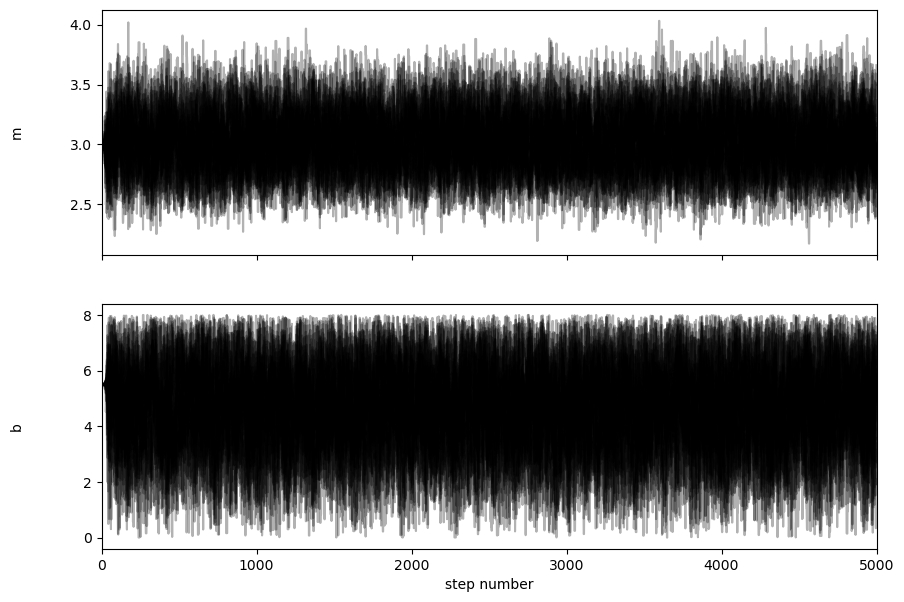

In [32]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

(10432, 2)


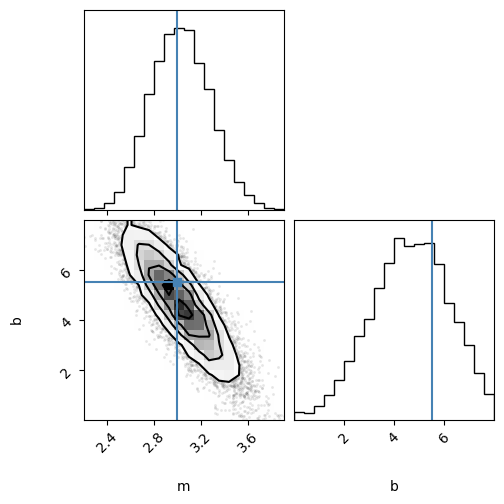

In [34]:
import corner

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

fig = corner.corner(
    flat_samples, labels=labels, truths=[3, 5.5]
);